In [30]:
print("\u0905\u0928\u0940\u0936")

अनीश


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [71]:
df = pd.read_csv("banana_quality.csv")
df

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good
...,...,...,...,...,...,...,...,...
7995,-6.414403,0.723565,1.134953,2.952763,0.297928,-0.156946,2.398091,Bad
7996,0.851143,-2.217875,-2.812175,0.489249,-1.323410,-2.316883,2.113136,Bad
7997,1.422722,-1.907665,-2.532364,0.964976,-0.562375,-1.834765,0.697361,Bad
7998,-2.131904,-2.742600,-1.008029,2.126946,-0.802632,-3.580266,0.423569,Bad


In [72]:
#binary encoding.

df['Quality'] = df['Quality'].apply(lambda x: 1 if x == 'Good' else 0)

In [73]:
df

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,1
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,1
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,1
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,1
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,1
...,...,...,...,...,...,...,...,...
7995,-6.414403,0.723565,1.134953,2.952763,0.297928,-0.156946,2.398091,0
7996,0.851143,-2.217875,-2.812175,0.489249,-1.323410,-2.316883,2.113136,0
7997,1.422722,-1.907665,-2.532364,0.964976,-0.562375,-1.834765,0.697361,0
7998,-2.131904,-2.742600,-1.008029,2.126946,-0.802632,-3.580266,0.423569,0


In [7]:

df.shape


(8000, 8)

In [8]:
df.isnull().sum()


Size           0
Weight         5
Sweetness      2
Softness       2
HarvestTime    1
Ripeness       3
Acidity        1
Quality        0
dtype: int64

In [9]:

df.isnull().sum().sum()


14

In [10]:

 df.dtypes

Size           float64
Weight         float64
Sweetness      float64
Softness       float64
HarvestTime    float64
Ripeness       float64
Acidity        float64
Quality          int64
dtype: object

In [11]:

 (df == 0).sum()


Size              2
Weight            0
Sweetness         2
Softness          0
HarvestTime       2
Ripeness          1
Acidity           1
Quality        3994
dtype: int64

In [12]:

 (df == 0).sum().sum()

4002

In [13]:

 df['Size'].mean().round(2)


-0.75

In [14]:

df.corr()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
Size,1.000000,-0.181955,-0.257237,0.164435,0.581919,0.042415,-0.140351,0.353276
Weight,-0.181955,1.000000,0.422374,-0.189907,-0.079308,-0.034820,0.443661,0.388612
Sweetness,-0.257237,0.422374,1.000000,-0.095040,-0.201116,0.180424,0.186261,0.377178
Softness,0.164435,-0.189907,-0.095040,1.000000,0.194324,-0.253744,-0.145959,-0.001870
HarvestTime,0.581919,-0.079308,-0.201116,0.194324,1.000000,0.107190,-0.090772,0.376842
Ripeness,0.042415,-0.034820,0.180424,-0.253744,0.107190,1.000000,-0.351788,0.350737
Acidity,-0.140351,0.443661,0.186261,-0.145959,-0.090772,-0.351788,1.000000,-0.001240
Quality,0.353276,0.388612,0.377178,-0.001870,0.376842,0.350737,-0.001240,1.000000


In [15]:

corr_matrix = df.corr().abs()


sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))


In [16]:

sol_df = sol.reset_index()
sol_df.columns = ['Feature 1', 'Feature 2', 'Correlation']
sol_df['Correlation'] = sol_df['Correlation'].round(2)

print(sol_df)

      Feature 1    Feature 2  Correlation
0          Size  HarvestTime         0.58
1        Weight      Acidity         0.44
2        Weight    Sweetness         0.42
3        Weight      Quality         0.39
4     Sweetness      Quality         0.38
5   HarvestTime      Quality         0.38
6          Size      Quality         0.35
7      Ripeness      Acidity         0.35
8      Ripeness      Quality         0.35
9          Size    Sweetness         0.26
10     Softness     Ripeness         0.25
11    Sweetness  HarvestTime         0.20
12     Softness  HarvestTime         0.19
13       Weight     Softness         0.19
14    Sweetness      Acidity         0.19
15         Size       Weight         0.18
16    Sweetness     Ripeness         0.18
17         Size     Softness         0.16
18     Softness      Acidity         0.15
19         Size      Acidity         0.14
20  HarvestTime     Ripeness         0.11
21    Sweetness     Softness         0.10
22  HarvestTime      Acidity      

In [29]:

most_corr_pair = sol_df.iloc[0]
feature1, feature2 = most_corr_pair['Feature 1'], most_corr_pair['Feature 2']

x = df[feature1]
y = df[feature2]
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25 , random_state=42)

training_x = X_train.shape[0]
testing_x = X_test.shape[0]
training_y = Y_train.shape[0]
testing_y = Y_test.shape[0]

print("the size of training dataset: ",(training_x, training_y))
print("the size of testing dataset:  ",(testing_x, testing_y))

the size of training dataset:  (6000, 6000)
the size of testing dataset:   (2000, 2000)


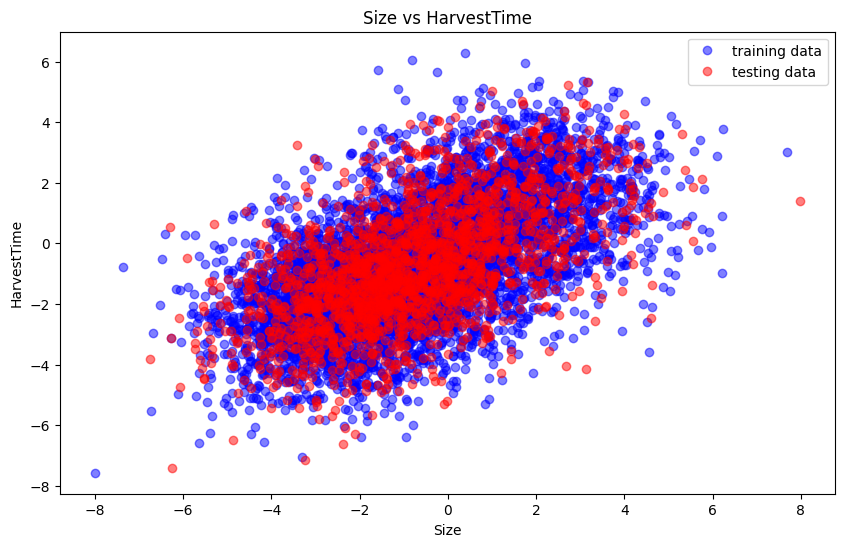

In [22]:

plt.figure(figsize=(10, 6))
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'{feature1} vs {feature2}')
plt.plot(X_train, Y_train,linestyle='',color='blue' ,alpha=0.5,marker="o",label="training data")
plt.plot(X_test,Y_test,linestyle='',color='red' ,alpha=0.5,marker="o",label="testing data")
plt.legend()
plt.show()